<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Create ResNext structure graph and attenuation coefficient graph.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [3]:
%cd ../..


C:\Users\julia\Documents\Imperial\DA_project


In [12]:
fp = "experiments/DA/01c/final.txt"
fp1 = "report/figures/resNeXt_heatmap.png"


In [5]:
with open(fp, "rb") as f:
    results = pickle.load(f)

In [14]:
res = []
for data in results:
    da_MSE, params = data
    x = params["layers"]
    y = params["cardinality"]
    res.append((x, y, da_MSE))

In [24]:
results

[(0.2021611474184685,
  OrderedDict([('cardinality', 4),
               ('layers', 27),
               ('block_type', 'NeXt'),
               ('mod', 'ResNeXt3'),
               ('enc', 0.05982263386249542),
               ('dec', 0.07830227166414261)])),
 (0.20428880960702483,
  OrderedDict([('cardinality', 8),
               ('layers', 27),
               ('block_type', 'NeXt'),
               ('mod', 'ResNeXt3'),
               ('enc', 0.06473933160305023),
               ('dec', 0.0749773383140564)])),
 (0.20597038366227857,
  OrderedDict([('cardinality', 8),
               ('layers', 3),
               ('block_type', 'NeXt'),
               ('mod', 'ResNeXt3'),
               ('enc', 0.05901895835995674),
               ('dec', 0.07342158257961273)])),
 (0.20600817581905412,
  OrderedDict([('cardinality', 16),
               ('layers', 3),
               ('block_type', 'NeXt'),
               ('mod', 'ResNeXt3'),
               ('enc', 0.05932232365012169),
               ('dec', 

In [26]:
res1 = pd.DataFrame(res, columns=["layers, L", "cardinality, N", "DA MSE"])
res_piv = pd.pivot_table(res1, values="DA MSE", index=["cardinality, N"], columns="layers, L")

In [27]:
# fig = plt.figure() 
# ax = fig.gca(projection='3d')
# ax.plot_trisurf(res1['cardinality'], res1['layers'], res1["DA MSE"], cmap=plt.cm.viridis, linewidth=0.2)
# ax.view_init(30, 45)


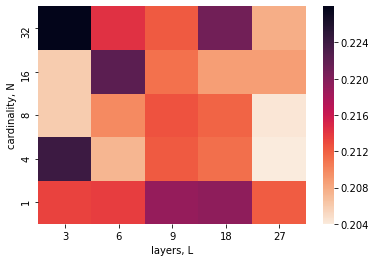

In [28]:
ax = sns.heatmap(res_piv, cmap=sns.cm.rocket_r, fmt=".3f", vmin=0.204)
ax.invert_yaxis()
fig = ax.get_figure()


In [29]:
fig.savefig(fp1)